<a href="https://colab.research.google.com/github/yunuszeyveli/final_case/blob/main/final_case_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:68: SyntaxWarning: invalid escape sequence '\$'
<>:68: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2893050807.py:68: SyntaxWarning: invalid escape sequence '\$'
  df[income_col] = df[income_col].replace("[\$,]", "", regex=True).astype(float)


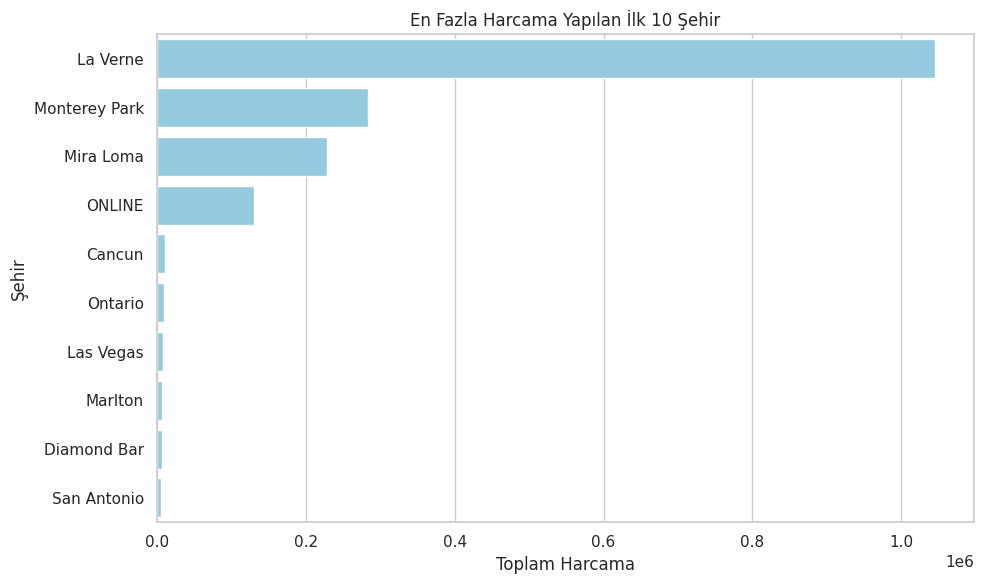

/tmp/ipython-input-2893050807.py:44: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["hour"] = pd.to_datetime(df[time_col], infer_datetime_format=True, errors="coerce").dt.hour
/tmp/ipython-input-2893050807.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour"] = pd.to_datetime(df[time_col], infer_datetime_format=True, errors="coerce").dt.hour


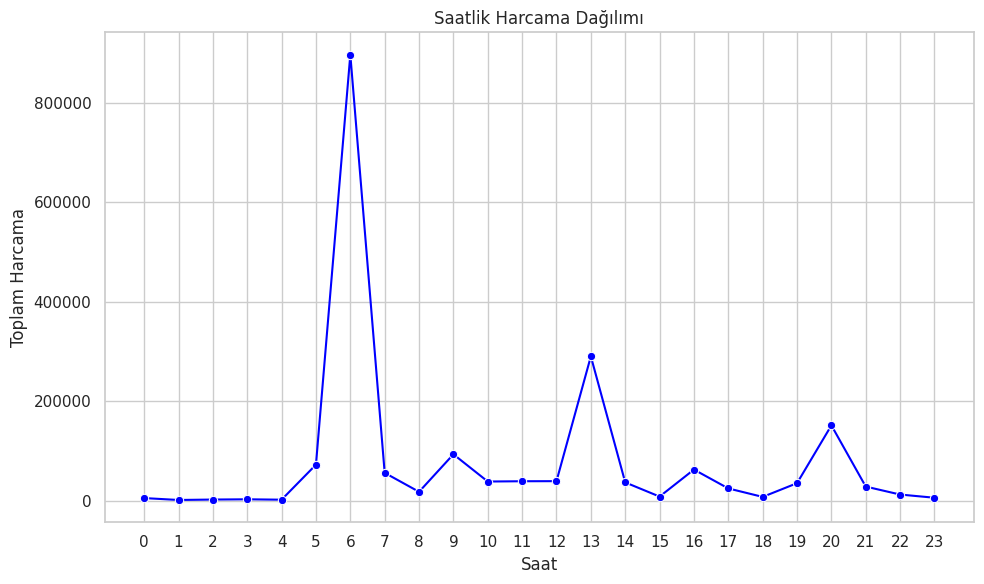

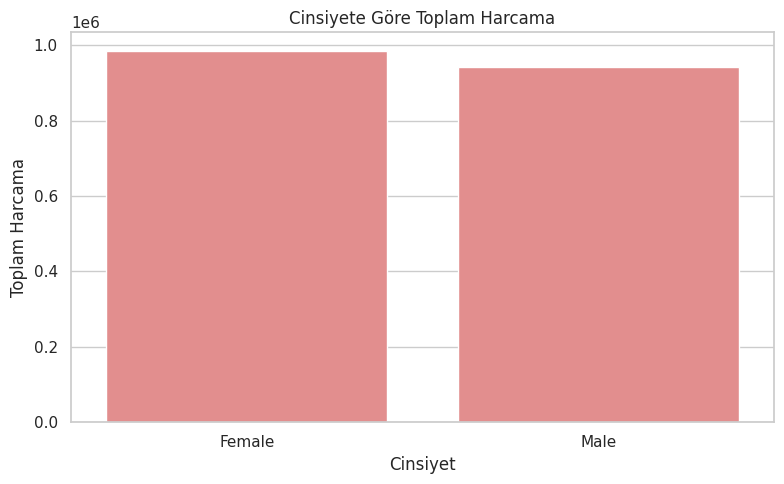

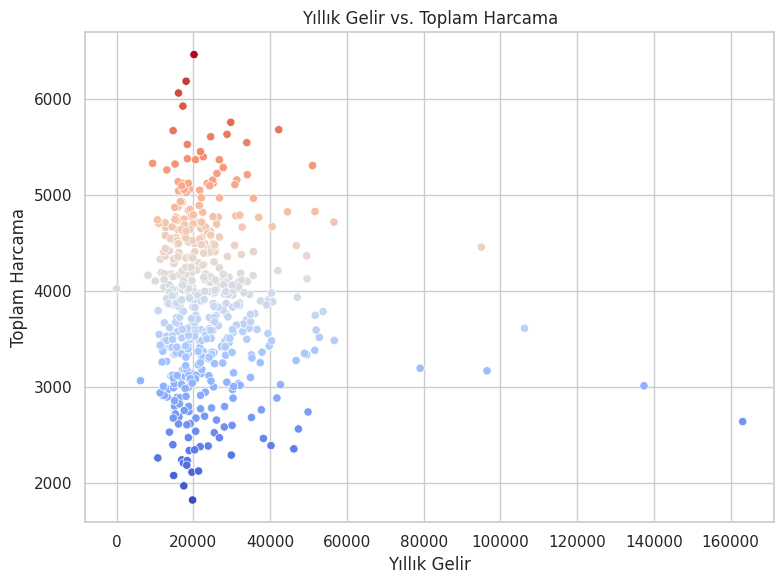


--- Analiz Sonuçları ---
En fazla harcama yapılan şehir: La Verne
En fazla harcama yapılan saat: 6:00
En fazla harcama yapan cinsiyet: Female
En fazla harcama yapan kişinin yıllık geliri: 20159.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load CSVs
users = pd.read_csv("/content/users.csv")
transactions = pd.read_csv("/content/transactions.csv")

# Column names
users.columns = users.columns.str.strip().str.lower()
transactions.columns = transactions.columns.str.strip().str.lower()

# Merge on 'user'
df = transactions.merge(users, on="user", how="inner")

# Identify columns
amount_col = [col for col in df.columns if "amount" in col][0]
city_col = [col for col in df.columns if "city" in col][0]
time_col = [col for col in df.columns if "time" in col][0]
income_col = [col for col in df.columns if "income" in col][0]
gender_col = [col for col in df.columns if "gender" in col][0]

# Convert amount to numeric
df[amount_col] = pd.to_numeric(df[amount_col], errors="coerce")

# Drop missing values
df = df.dropna(subset=[amount_col, city_col, time_col, gender_col, income_col])


# Top 10 cities
city_totals = df.groupby(city_col)[amount_col].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=city_totals.values, y=city_totals.index, color="skyblue")
plt.title("En Fazla Harcama Yapılan İlk 10 Şehir")
plt.xlabel("Toplam Harcama")
plt.ylabel("Şehir")
plt.tight_layout()
plt.show()


# Hourly spending
df["hour"] = pd.to_datetime(df[time_col], infer_datetime_format=True, errors="coerce").dt.hour
hourly_totals = df.groupby("hour")[amount_col].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_totals.index, y=hourly_totals.values, marker="o", color="blue")
plt.title("Saatlik Harcama Dağılımı")
plt.xlabel("Saat")
plt.ylabel("Toplam Harcama")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


# Spending by gender
gender_totals = df.groupby(gender_col)[amount_col].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_totals.index, y=gender_totals.values, color="lightcoral")
plt.title("Cinsiyete Göre Toplam Harcama")
plt.xlabel("Cinsiyet")
plt.ylabel("Toplam Harcama")
plt.tight_layout()
plt.show()


# Income vs spending
df[income_col] = df[income_col].replace("[\$,]", "", regex=True).astype(float)
income_expense = df.groupby("user").agg({
    income_col: "first",
    amount_col: "sum"
}).reset_index()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=income_expense, x=income_col, y=amount_col,
                hue=amount_col, palette="coolwarm", legend=False)
plt.title("Yıllık Gelir vs. Toplam Harcama")
plt.xlabel("Yıllık Gelir")
plt.ylabel("Toplam Harcama")
plt.tight_layout()
plt.show()


# Summary
print("\n--- Analiz Sonuçları ---")
print(f"En fazla harcama yapılan şehir: {city_totals.index[0]}")
print(f"En fazla harcama yapılan saat: {hourly_totals.idxmax()}:00")
print(f"En fazla harcama yapan cinsiyet: {gender_totals.idxmax()}")
top_income_user = income_expense.loc[income_expense[amount_col].idxmax()]
print(f"En fazla harcama yapan kişinin yıllık geliri: {top_income_user[income_col]}")
